In [3]:
import pandas as pd

file_path = '/Users/tanmaysagarhuria/Downloads/predictions.csv'

In [4]:
predictions_df = pd.read_csv(file_path)

In [8]:
print(predictions_df.head())

   Pred_price  Pred_volume
0    0.267859    -0.844586
1    0.268212    -0.850108
2    0.266619    -0.849999
3    0.245402    -0.851939
4    0.255634    -0.852168


In [9]:
price_data_df = pd.read_csv('/Users/tanmaysagarhuria/Downloads/filtered_data_mimed0101.csv')

In [17]:
price_data_df['Pred_price'] = predictions_df['Pred_price']

In [18]:
print(price_data_df.head())

  Type  adjusted_time_ints    adjusted_time       Price  Volume  Pred_price
0  ask                 0.0  0 days 00:00:00  258.684211     2.0    0.267859
1  ask                 1.0  0 days 00:01:00  254.000000     5.0    0.268212
2  ask                 2.0  0 days 00:02:00  258.000000     1.0    0.266619
3  ask                 3.0  0 days 00:03:00  259.000000     4.0    0.245402
4  ask                 4.0  0 days 00:04:00  261.000000     2.0    0.255634


EXPERIMENT-3: Prediction of RSI with just Predicted values

In [16]:
import pandas as pd

def calculate_rsi(data, window=14):
    # Calculate differences from one period to the next
    delta = data.diff()

    # Split the differences into gains and losses
    gain = delta.where(delta > 0, 0).rolling(window=window, min_periods=1).mean()
    loss = -delta.where(delta < 0, 0).rolling(window=window, min_periods=1).mean()

    # Replace zeros in loss to avoid division by zero
    loss[loss == 0] = 0.0001  # Add a small number to prevent division by zero

    # Calculate the Relative Strength (RS)
    RS = gain / loss

    # Calculate the RSI
    rsi = 100.0 - (100.0 / (1.0 + RS))

    return rsi

# Assuming your predictions DataFrame is named predictions_df
predictions_df['RSI'] = calculate_rsi(predictions_df['Pred_price'])



Step: Generate Trading Signals
Assuming a basic strategy where:

Buy when the predicted price is expected to rise significantly (let's define a threshold) and the RSI is below 30 (indicating that the asset might be oversold).
Sell when the predicted price is expected to drop and the RSI is above 70 (indicating that the asset might be overbought).

In [19]:
# Define thresholds for significant rise or drop
rise_threshold = 0.01  # Adjusted as per the scale of your predictions or domain knowledge
drop_threshold = -0.01 # Adjusted similarly

# Generate signals
predictions_df['Signal'] = 0
predictions_df.loc[(predictions_df['Pred_price'].diff() > rise_threshold) & (predictions_df['RSI'] < 30), 'Signal'] = 1  # Buy signal
predictions_df.loc[(predictions_df['Pred_price'].diff() < drop_threshold) & (predictions_df['RSI'] > 70), 'Signal'] = -1 # Sell signal


Explanation:
Diff(): This function is used to compute the change in the predicted price from one period to the next, which helps in identifying significant rises or drops.
Signal Assignment: This code creates a new column Signal in the DataFrame where a '1' represents a buy signal and '-1' represents a sell signal based on the conditions set.
Next Steps:
Once you have generated trading signals, you might want to simulate trading or evaluate how these signals would have performed historically. This would involve tracking the portfolio's value over time as you "buy" and "sell" based on the signals:

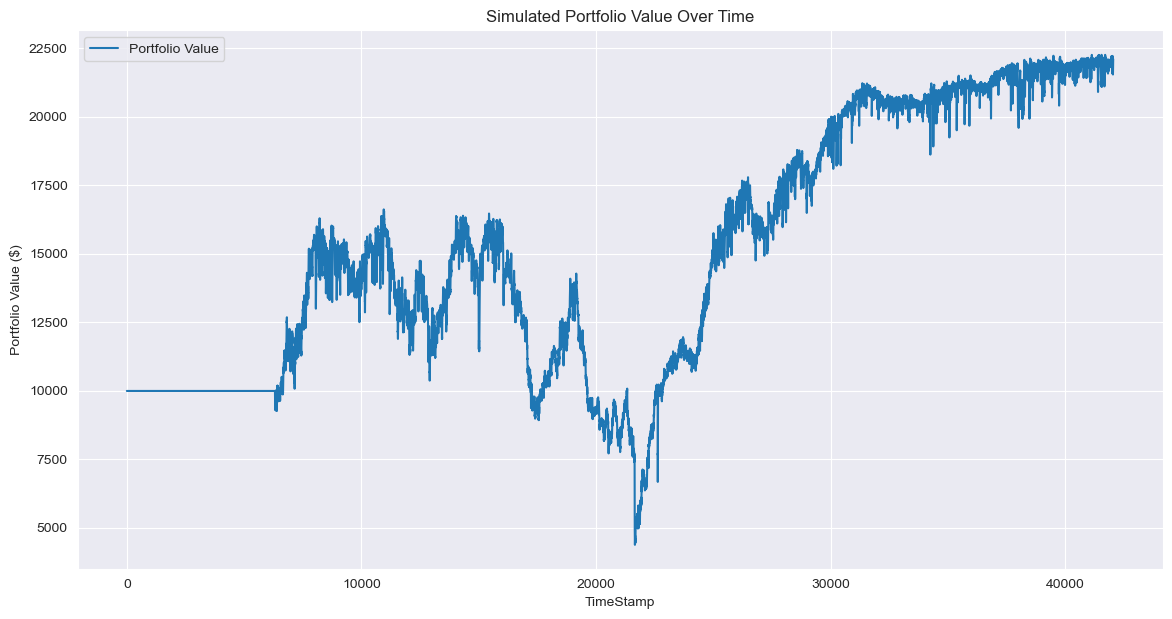

In [22]:
def simulate_trading(df, initial_capital):
    cash = initial_capital
    holdings = 0
    portfolio_values = []

    for index, row in df.iterrows():
        if row['Signal'] == 1 and cash > 0:  # Buy
            holdings = cash / row['Pred_price']  # Using predicted prices for buying
            cash = 0
        elif row['Signal'] == -1 and holdings > 0:  # Sell
            cash = holdings * row['Pred_price']  # Using predicted prices for selling
            holdings = 0
        
        # Calculate current portfolio value
        portfolio_value = cash + holdings * row['Pred_price']
        portfolio_values.append(portfolio_value)

    df['Portfolio_Value'] = portfolio_values
    return df

# Execute the trading simulation
initial_capital = 10000  # Starting with $10,000
predictions_df = simulate_trading(predictions_df, initial_capital)

# Optionally, plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(predictions_df.index, predictions_df['Portfolio_Value'], label='Portfolio Value')
plt.title('Simulated Portfolio Value Over Time')
plt.xlabel('TimeStamp')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()


Portfolio Value Calculation: It continues to calculate and track the value of your portfolio based on the actions taken (buy or sell) and the predicted prices.
Visualization: The added plotting functionality will help visualize the performance of your trading strategy over time.

In [23]:
def calculate_profit(df, initial_capital):
    # Assuming the last entry in 'Portfolio_Value' gives the final value of the portfolio
    final_value = df['Portfolio_Value'].iloc[-1]
    profit = final_value - initial_capital
    return profit

# Assuming initial capital was $10,000 (as used in the previous simulation)
initial_capital = 10000
profit = calculate_profit(predictions_df, initial_capital)

print(f"Initial Capital: ${initial_capital}")
print(f"Final Portfolio Value: ${predictions_df['Portfolio_Value'].iloc[-1]:.2f}")
print(f"Generated Profit: ${profit:.2f}")


Initial Capital: $10000
Final Portfolio Value: $22111.48
Generated Profit: $12111.48


What This Code Does:
Function Definition: The calculate_profit function calculates the difference between the final portfolio value and the initial capital to determine the profit or loss.
Get Final Portfolio Value: It accesses the last value of the Portfolio_Value column in your DataFrame, which represents the value of your portfolio at the end of the simulation.
Print Results: Outputs the initial investment, the final portfolio value, and the calculated profit to the console.

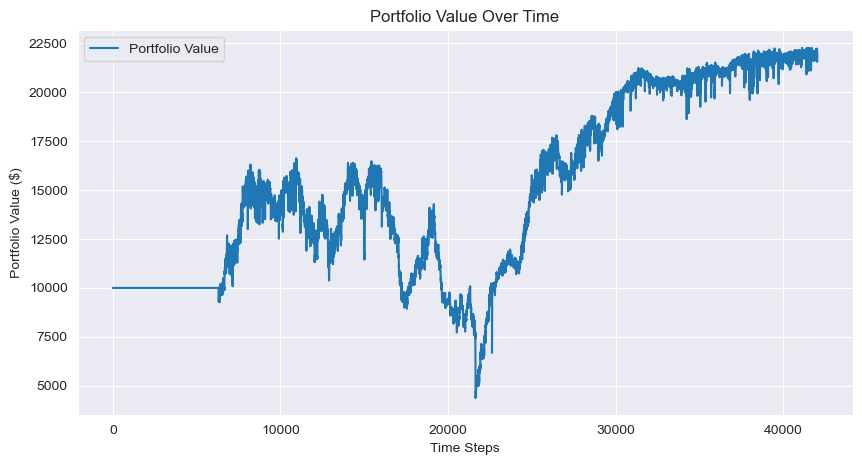

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(predictions_df['Portfolio_Value'], label='Portfolio Value')
plt.title('Portfolio Value Over Time')
plt.xlabel('Time Steps')
plt.ylabel('Portfolio Value ($)')
plt.legend()
plt.grid(True)
plt.show()


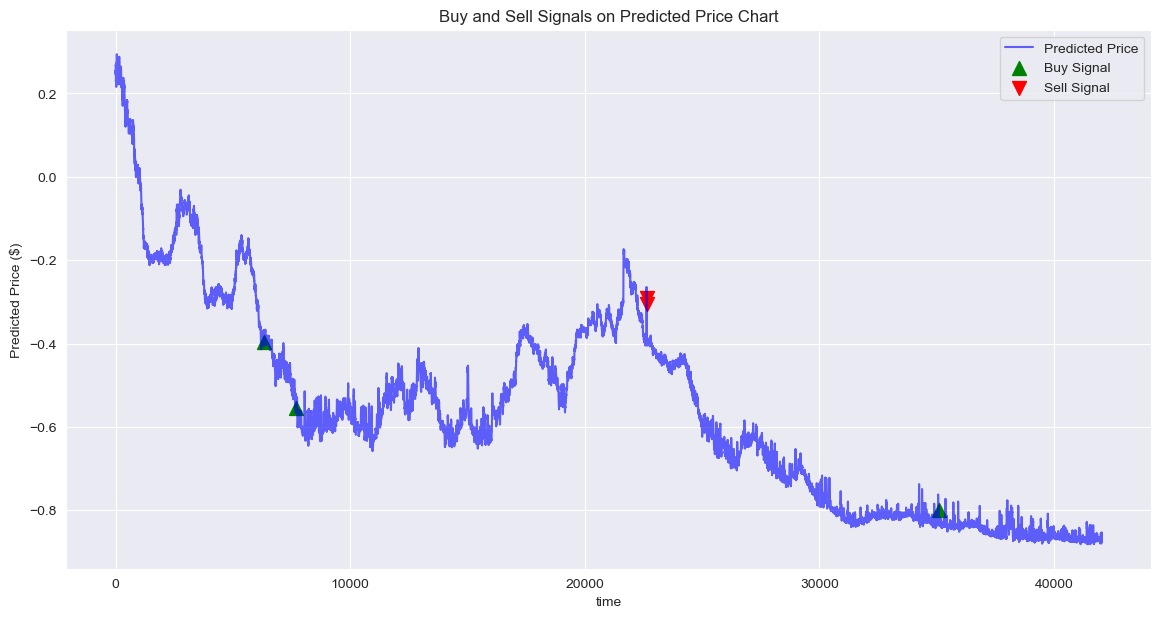

In [26]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
plt.figure(figsize=(14, 7))

# Plot predicted prices
plt.plot(predictions_df.index, predictions_df['Pred_price'], label='Predicted Price', color='blue', alpha=0.6)

# Identify buy signals (where Signal == 1)
buy_signals = predictions_df[predictions_df['Signal'] == 1]
# Identify sell signals (where Signal == -1)
sell_signals = predictions_df[predictions_df['Signal'] == -1]

# Scatter plot for buy signals
plt.scatter(buy_signals.index, buy_signals['Pred_price'], color='green', label='Buy Signal', marker='^', alpha=1.0, s=100)

# Scatter plot for sell signals
plt.scatter(sell_signals.index, sell_signals['Pred_price'], color='red', label='Sell Signal', marker='v', alpha=1.0, s=100)

# Add titles and labels
plt.title('Buy and Sell Signals on Predicted Price Chart')
plt.xlabel('time')
plt.ylabel('Predicted Price ($)')
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()


Line Plot: The predicted prices are plotted as a line chart, providing a continuous view of how the price predictions evolve over time.
Scatter Plots: Separate scatter plots are used for buy and sell signals. Buy signals are marked with green upward-pointing triangles, and sell signals are marked with red downward-pointing triangles.
Visibility and Style: The alpha parameter controls the transparency of the points, and s controls the size of the markers for better visibily